En este notebook estudió un par de librerias de python que contienen solucionadores numéricos.

Primermuestro una manera para resolver una ecuación diferencial sencilla utilizando "odeint" de la librería scipy.

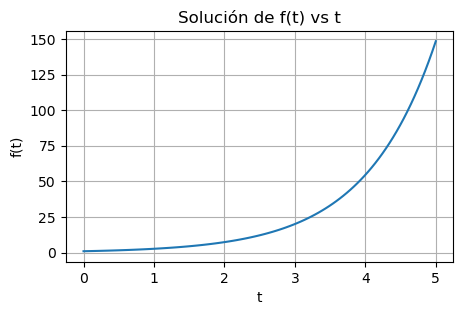

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la ecuación diferencial
def f(y, t):
    return y

# Condición inicial
y0 = 1.0

# Puntos donde deseamos obtener la solución
t = np.linspace(0, 5, 100)  # Intervalo de tiempo donde queremos la solución

# Resolver la ecuación diferencial
sol = odeint(f, y0, t)

# Graficar la solución
plt.figure(figsize=(5, 3))
plt.plot(t, sol)
plt.title('Solución de f(t) vs t')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.show()

In [2]:
#Un jueguito, no más
H = [[1, 2, 3, 4], [1, 2, 3, 4]]
H_array = np.array(H)

G = H_array[:, 2]

print(G)

[3 3]


Ahora resolveremos, utilizando el mismo solucionador, la ecuación de un péndulo con fricción:

$$ \theta''(t) + b\theta'(t) + csin(\theta(t)) = 0 $$

que se plantea como el siguiente sistema:

$ \theta'(t) = \omega(t) $

$ \omega(t) = -b\omega(t) - c\sin\theta(t) $

Lo vamos a tirar desde el reposo en una posición casi vertical, de tal modo que las condiciones iniciales son:

$\theta(0) = \pi -0.1$

$\omega(0) = 0 $

Esto no tiene sentido físico porque el péndulo no oscilaría.

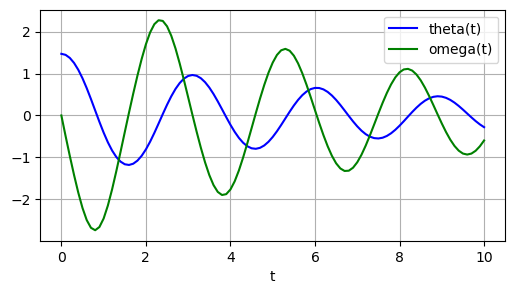

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Sistema de ecuaciones
def Pendulo(y, t, b, c): # Se entiende que y es un vector con las variables
    theta, omega = y # Aquí lo verificas
    dydt = [omega, -b*omega - c*np.sin(theta)] # La derivada de ese vector
    return dydt

# Constantes físicas del sistema
b = 0.25
c = 5.0

y0 = [np.pi/2 - 0.1, 0.0] # Vector de condiciones iniciales

t = np.linspace(0, 10, 101) # El son 101 punto tomados del intervalo [0,1]

# Invocamos a Odeint "To pass the parameters b and c to pend, we give them to odeint using the args argument."
# The solution is an array with shape (101, 2). The first column is theta(t), and the second is omega(t)
sol = odeint(Pendulo, y0, t, args=(b, c))

# Extraemos la solución, dijera el Chat GPT
theta = sol[:,0]
omega = sol[:,1]

# Grafica la solución
plt.figure(figsize=(6, 3))
plt.plot(t, theta, 'b', label='theta(t)')
plt.plot(t, omega, 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

El siguiente ejemplo consiste en resolver las ecuaciones de Lotka-Volterra pero utilizando el solucionador solve_ivp. Igualmente de scipy.

$$ \dfrac{dx}{dt} = x(a-by) $$

$$ \dfrac{dy}{dt} = -y(c-dy) $$

con condiciones iniciales

$ x_0 = 10 $

$ y_0 = 5 $

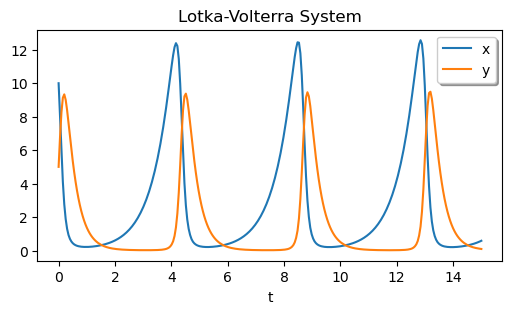

In [4]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

def lotkavolterra(t, z, a, b, c, d):
    x, y = z # Lo mismo, pa, z es un vector
    return [x*(a - b*y), -y*(c - d*x)]

# Parámetros físicos y condiciones iniciales
a, b, c, d = 1.5, 1, 3, 1
x0 = 10
y0 = 5

# Esto es una solución pero quién sabe con cuántos puntos
sol = solve_ivp(lotkavolterra, [0, 15], [x0, y0], args=(a, b, c, d), dense_output=True)
              # (Ecuaciones, intervalo, condición inicial, argumentos que no son variables, "Solución Contínua")

# Definiéndo ésto ya especifícas cuántos puntos quieres
t = np.linspace(0, 15, 300)
z = sol.sol(t) # Esto es una matriz de dos columnas

# Graficamos
plt.figure(figsize=(6,3))
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()